### Tabular Baseline Model


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("train(1).xlsx")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
df.shape

(16209, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

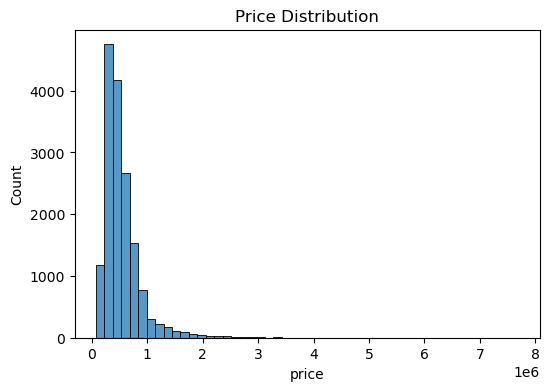

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins = 50)
plt.title("Price Distribution")
plt.show()

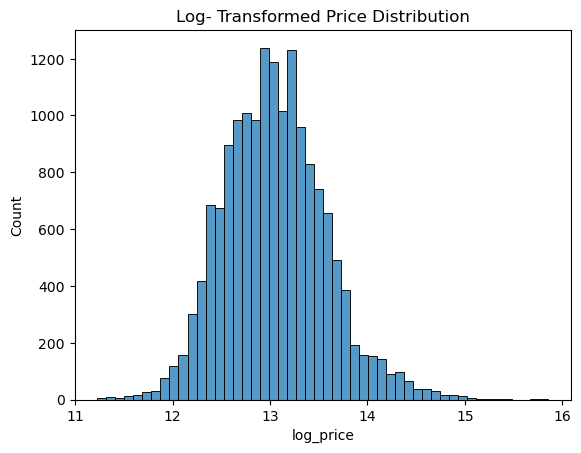

In [9]:
df['log_price'] = np.log1p(df['price'])
sns.histplot(df['log_price'] ,bins = 50)
plt.title("Log- Transformed Price Distribution")
plt.show()

In [10]:
X = df.iloc[:, 3:21]
Y = df['log_price']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
lr_r2 = r2_score(Y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

In [15]:
lr_r2

0.7770935269691588

In [16]:
lr_rmse

np.float64(0.24801585435657902)

In [17]:
coefficients = model.coef_
coef_df = pd.DataFrame(
    {'Feature' : X.columns,
     'Coefficient' : model.coef_})
coef_df

,Feature,Coefficient
0,bedrooms,-1.459279e-02
1,bathrooms,7.173347e-02
2,sqft_living,9.905754e-05
3,sqft_lot,3.238627e-07
4,floors,7.423704e-02
5,waterfront,3.673415e-01
6,view,6.467435e-02
7,condition,5.820927e-02
8,grade,1.566005e-01
9,sqft_above,3.986703e-05


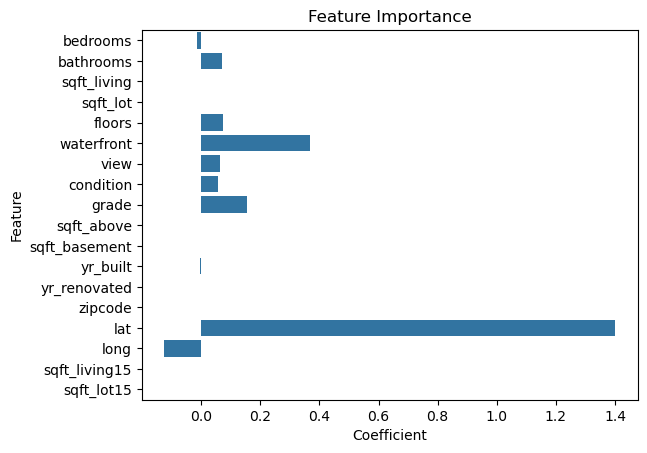

In [18]:
sns.barplot(
    x = 'Coefficient',
    y = 'Feature',
    data = coef_df)
plt.title("Feature Importance")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators = 400,
    random_state = 42,
    n_jobs = -1)
rf_model.fit(X_train, Y_train)

,n_estimators,400
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred_rf = rf_model.predict(X_test)

In [21]:
rf_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
rf_r2 = r2_score(Y_test, y_pred_rf)

In [22]:
rf_rmse

np.float64(0.1783979903181747)

In [23]:
rf_r2

0.8846696240304001

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
from xgboost import XGBRegressor

In [26]:
xgb_model = XGBRegressor(
    n_estimators = 500,
    learning_rate = 0.05,
    max_depth = 6,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    objective = 'reg:squarederror'
)
xgb_model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [27]:
y_pred_xgb = xgb_model.predict(X_test)

In [28]:
xgb_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_xgb))
xgb_r2 = r2_score(Y_test, y_pred_xgb)                   

In [29]:
xgb_rmse

np.float64(0.16381885819848743)

In [30]:
xgb_r2

0.9027495584841366

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    "n_estimators"  : [300, 400, 500],
    "max_depth"  : [5,6],
    "learning_rate" : [0.05, 0.1]
}
xgb_tuned = XGBRegressor(
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

grid = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV R2:", grid.best_score_)
    

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400}
Best CV R2: 0.900733566162604


In [32]:
xgb_final = XGBRegressor(
    n_estimators = 400,
    learning_rate = 0.05,
    max_depth = 6,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    objective = 'reg:squarederror'
)
xgb_final.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [33]:
y_pred_xgb_final = xgb_final.predict(X_test)

In [34]:
xgb_final_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_xgb_final))
xgb_final_r2 = r2_score(Y_test, y_pred_xgb_final)  

In [35]:
xgb_final_rmse

np.float64(0.16354027575024083)

In [36]:
xgb_final_r2

0.903080036067582

In [37]:
df_test = pd.read_excel("test2.xlsx")

In [38]:
X_unseen_test = df_test.iloc[:, 2:21]


In [39]:
y_unseen_pred = xgb_final.predict(X_unseen_test)

In [40]:
y_unseen_pred_actual = np.expm1(y_unseen_pred)
df_test["predicted_price"] = y_unseen_pred_actual
df_test.to_csv("tabular_predictions.csv", index=False)

In [41]:
!pip install tensorflow

In [42]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

C:\Users\mkd10\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [43]:
cnn_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    pooling="avg",       
    input_shape=(224, 224, 3)
)

In [44]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img


In [45]:
IMAGE_DIR = "Satellite Imagess"

available_ids = {
    int(f.replace(".png", ""))
    for f in os.listdir(IMAGE_DIR)
    if f.endswith(".png") and f.replace(".png", "").isdigit()
}

df_with_images = df[df["id"].isin(available_ids)].copy()
print("Rows with images:", len(df_with_images))


Rows with images: 16209


In [46]:
from tqdm import tqdm
BATCH_SIZE = 32   

image_features = []
valid_ids = []

batch_imgs = []
batch_ids = []

for image_id in tqdm(df_with_images["id"], desc="Extracting EfficientNet features"):
    image_path = f"{IMAGE_DIR}/{image_id}.png"
    if not os.path.exists(image_path):
        continue

    img = preprocess_image(image_path)
    batch_imgs.append(img)
    batch_ids.append(image_id)

    if len(batch_imgs) == BATCH_SIZE:
        batch_imgs = np.array(batch_imgs)
        feats = cnn_model.predict(batch_imgs, verbose=0)

        image_features.extend(feats)
        valid_ids.extend(batch_ids)

        batch_imgs, batch_ids = [], []


if batch_imgs:
    batch_imgs = np.array(batch_imgs)
    feats = cnn_model.predict(batch_imgs, verbose=0)
    image_features.extend(feats)
    valid_ids.extend(batch_ids)


Extracting EfficientNet features: 100%|██████████████████████████████████████████| 16209/16209 [12:55<00:00, 20.91it/s]


In [59]:
image_features = np.array(image_features)
valid_ids = np.array(valid_ids)

print(image_features.shape)  
print(len(valid_ids))        


(16209, 1280)
16209


In [48]:
image_feature_df = pd.DataFrame(
    image_features,
    index=valid_ids
)
image_feature_df.index.name = "id"


In [49]:
image_features = np.array(image_features)
print(image_features.shape)

(16209, 1280)


In [67]:
df = pd.read_excel("train(1).xlsx")

df["id"] = df["id"].astype(int)
df = df.set_index("id")

image_feature_df.index = image_feature_df.index.astype(int)

multimodal_df = df.join(image_feature_df, how="inner")
print(multimodal_df.shape)

(16407, 1300)


In [68]:
multimodal_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
id,,,,,,,,,,,,,,,,,,,,,
9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,3,...,-0.039498,-0.141183,-0.113917,-0.181515,-0.109959,0.799550,-0.052546,-0.152143,0.027794,0.331346
6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,4,...,-0.074750,-0.114395,0.040671,0.010139,-0.106416,0.233204,-0.030556,-0.129401,-0.124594,1.117049
7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,3,...,-0.087397,-0.162163,-0.101559,-0.055504,-0.101892,0.200093,-0.001593,-0.012205,-0.169299,0.778455
8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,3,...,0.234246,-0.162054,-0.067682,-0.095337,-0.140529,-0.114930,-0.021643,0.041178,0.197786,0.756656
7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,3,...,-0.051278,-0.058056,-0.025310,-0.150455,-0.192511,0.223701,-0.010383,-0.183473,0.004437,0.382542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,3,...,-0.075996,-0.082407,-0.070713,-0.079235,-0.111301,0.882396,-0.047167,-0.090519,-0.066480,0.820946
9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,3,...,-0.073402,-0.005242,-0.047934,0.167333,-0.171875,-0.027739,-0.155971,0.008547,0.018515,0.639207
7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,3,...,0.102952,0.186071,-0.132011,0.006609,-0.128127,0.101371,0.230134,-0.201134,-0.090215,0.239603


In [70]:
total_rows = len(multimodal_df)
unique_ids = multimodal_df.index.nunique()

print("Total rows:", total_rows)
print("Unique IDs:", unique_ids)



Total rows: 16407
Unique IDs: 16110


In [ ]:
multimodal_df = multimodal_df[~multimodal_df.index.duplicated(keep="first")]
print("Duplicate index count after cleanup:", multimodal_df.index.duplicated().sum())
print("Final shape:", multimodal_df.shape)

Duplicate index count: 0
Duplicate index count after cleanup: 0
Final shape: (16110, 1300)


In [71]:
duplicate_ids = multimodal_df.index[multimodal_df.index.duplicated()]

print("Number of duplicate IDs:", len(duplicate_ids))




Number of duplicate IDs: 297


In [72]:
multimodal_df = multimodal_df[~multimodal_df.index.duplicated(keep="first")]


In [73]:
print("After cleanup:", multimodal_df.index.duplicated().sum())


After cleanup: 0


In [74]:
missing_image_features = multimodal_df.filter(regex="^0$").isnull().sum().sum()
print("Missing image feature values:", missing_image_features)


Missing image feature values: 0


In [76]:
import numpy as np

y = np.log(multimodal_df["price"])
x = multimodal_df.drop(columns=["price"])
x = x.drop(columns=["date"])



In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [78]:
image_cols = image_feature_df.columns       
tabular_cols = X.columns.difference(image_cols)


In [79]:
print(len(image_cols))      
print(len(tabular_cols))   

1280
18


In [85]:
print(type(x_train))
print(x_train.columns[:30])


<class 'pandas.core.frame.DataFrame'>
Index([     'bedrooms',     'bathrooms',   'sqft_living',      'sqft_lot',
              'floors',    'waterfront',          'view',     'condition',
               'grade',    'sqft_above', 'sqft_basement',      'yr_built',
        'yr_renovated',       'zipcode',           'lat',          'long',
       'sqft_living15',    'sqft_lot15',               0,               1,
                     2,               3,               4,               5,
                     6,               7,               8,               9,
                    10,              11],
      dtype='object')


In [87]:
image_cols = [c for c in x_train.columns if isinstance(c, int)]
tabular_cols = [c for c in x_train.columns if not isinstance(c, int)]


In [88]:
print(len(image_cols))        
print(len(tabular_cols))    


1280
18


In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128, random_state=42)

x_train_img_pca = pca.fit_transform(x_train[image_cols])
x_test_img_pca  = pca.transform(x_test[image_cols])


In [91]:
import numpy as np

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio (first 10 components):")
print(explained_variance_ratio[:10])

total_variance = np.sum(explained_variance_ratio)

print(f"Total explained variance with {pca.n_components_} components: "
      f"{total_variance:.4f}")


Explained variance ratio (first 10 components):
[0.17995074 0.10127345 0.06552111 0.05037125 0.03974521 0.03555543
 0.0260608  0.02291287 0.01838477 0.01589346]
Total explained variance with 128 components: 0.8799


In [95]:
import pandas as pd

pca_feature_names = [f"pca_img_{i}" for i in range(x_train_img_pca.shape[1])]

x_train_img_pca_df = pd.DataFrame(
    x_train_img_pca,
    index=x_train.index,
    columns=pca_feature_names
)

x_test_img_pca_df = pd.DataFrame(
    x_test_img_pca,
    index=x_test.index,
    columns=pca_feature_names
)


In [96]:
x_train_tab = x_train[tabular_cols]
x_test_tab  = x_test[tabular_cols]


In [97]:
x_train_final = pd.concat([x_train_tab, x_train_img_pca_df], axis=1)
x_test_final  = pd.concat([x_test_tab, x_test_img_pca_df], axis=1)


In [98]:
print(x_train_final.shape)
print(x_test_final.shape)

assert x_train_final.isnull().sum().sum() == 0
assert x_test_final.isnull().sum().sum() == 0


(12888, 146)
(3222, 146)


In [99]:
x_train_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,pca_img_118,pca_img_119,pca_img_120,pca_img_121,pca_img_122,pca_img_123,pca_img_124,pca_img_125,pca_img_126,pca_img_127
id,,,,,,,,,,,,,,,,,,,,,
7934000090,2,1.00,690,5200,1.0,0,0,3,6,690,...,-0.150845,0.070337,0.181446,-0.135823,0.258744,0.150291,0.119449,-0.131306,-0.353575,-0.109987
4310700570,2,1.00,920,5000,1.0,0,0,4,6,490,...,0.001220,-0.158300,-0.020864,0.361417,0.195436,0.059491,0.099181,-0.121622,-0.183052,0.010294
7504060020,4,2.25,2520,10370,2.0,0,0,3,9,2520,...,-0.308899,-0.082093,-0.489778,0.260219,0.016363,0.124765,-0.455339,-0.229977,-0.152702,-0.296998
8910500150,3,1.50,1460,5040,1.0,0,0,3,7,1100,...,0.161149,-0.226444,0.156045,0.195540,0.076715,0.091166,-0.081048,0.064405,0.028430,-0.149719
1925059049,3,1.00,1175,10454,1.0,0,0,4,6,1175,...,-0.233677,0.086384,0.063698,0.095494,-0.330475,0.221340,-0.000111,0.306632,-0.201703,-0.177406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215901190,3,2.00,1480,7480,1.0,0,0,4,7,1480,...,0.104699,0.130323,-0.232945,0.117475,-0.038368,-0.182340,-0.103968,-0.285066,0.135701,-0.089240
9268850860,5,3.25,2710,2356,2.0,0,0,3,8,2230,...,0.044402,0.201579,-0.065471,0.080974,-0.191357,0.093003,0.126976,-0.020750,-0.156859,-0.121637
8952900260,3,1.00,1130,12500,1.5,0,0,3,7,1130,...,-0.024429,0.049480,-0.147130,-0.495523,0.051633,-0.043744,-0.009297,0.339499,-0.083231,0.173183


In [102]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from xgboost import XGBRegressor


In [103]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [105]:
r2_scores = []
rmse_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(x_train_final), 1):
    X_tr, X_val = x_train_final.iloc[train_idx], x_train_final.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = XGBRegressor(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=1.0,
        reg_lambda=2.0,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_tr, y_tr)

    y_val_pred = model.predict(X_val)

    r2 = r2_score(y_val, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    r2_scores.append(r2)
    rmse_scores.append(rmse)

    print(f"Fold {fold}: R2 = {r2:.4f}, RMSE = {rmse:.4f}")


Fold 1: R2 = 0.8924, RMSE = 0.1702
Fold 2: R2 = 0.8973, RMSE = 0.1700
Fold 3: R2 = 0.8853, RMSE = 0.1776
Fold 4: R2 = 0.8955, RMSE = 0.1653
Fold 5: R2 = 0.8897, RMSE = 0.1735


In [106]:
print("\nCross-Validation Results:")
print(f"Mean R2   : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Mean RMSE : {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")



Cross-Validation Results:
Mean R2   : 0.8920 ± 0.0043
Mean RMSE : 0.1713 ± 0.0041


In [109]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_test_pred = xgb_model_pca.predict(x_test_final)

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Test R2:", r2)
print("Test RMSE:", rmse)


Test R2: 0.8987334187974336
Test RMSE: 0.16833010964537376


In [111]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    "n_estimators"  : [300, 400, 500],
    "max_depth"  : [5,6],
    "learning_rate" : [0.05, 0.1]
}
xgb_pca_tuned = XGBRegressor(
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

grid = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV R2:", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}
Best CV R2: 0.894813464363882


In [112]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input


In [114]:
test_df = pd.read_excel("test2.xlsx")

test_df["id"] = test_df["id"].astype(int)
test_df = test_df.set_index("id")

print(test_df.shape)


(5404, 19)


In [115]:
cnn_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    pooling="avg",
    input_shape=(224, 224, 3)
)


In [116]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img


In [117]:
IMAGE_DIR_TEST = "images_test"
BATCH_SIZE = 32

image_features = []
valid_ids = []

batch_imgs = []
batch_ids = []

for image_id in tqdm(test_df.index, desc="Extracting test image features"):
    image_path = f"{IMAGE_DIR_TEST}/{image_id}.png"
    if not os.path.exists(image_path):
        continue

    img = preprocess_image(image_path)
    batch_imgs.append(img)
    batch_ids.append(image_id)

    if len(batch_imgs) == BATCH_SIZE:
        batch_imgs = np.array(batch_imgs)
        feats = cnn_model.predict(batch_imgs, verbose=0)

        image_features.extend(feats)
        valid_ids.extend(batch_ids)

        batch_imgs, batch_ids = [], []

if batch_imgs:
    batch_imgs = np.array(batch_imgs)
    feats = cnn_model.predict(batch_imgs, verbose=0)
    image_features.extend(feats)
    valid_ids.extend(batch_ids)


Extracting test image features: 100%|██████████████████████████████████████████████| 5404/5404 [05:28<00:00, 16.45it/s]


In [118]:
image_features = np.array(image_features)

image_feature_test_df = pd.DataFrame(
    image_features,
    index=valid_ids
)

image_feature_test_df.index.name = "id"

print(image_feature_test_df.shape)


(5404, 1280)


In [119]:
test_multimodal_df = test_df.join(image_feature_test_df, how="inner")
print(test_multimodal_df.shape)


(5420, 1299)


In [120]:
total_rows = len(test_multimodal_df)
unique_ids = test_multimodal_df.index.nunique()

print("Total rows:", total_rows)
print("Unique IDs:", unique_ids)


Total rows: 5420
Unique IDs: 5396


In [121]:
test_multimodal_df = test_multimodal_df[~test_multimodal_df.index.duplicated(keep="first")]
print("Duplicate index count after cleanup:", test_multimodal_df.index.duplicated().sum())
print("Final shape:", test_multimodal_df.shape)

Duplicate index count after cleanup: 0
Final shape: (5396, 1299)


In [122]:
X_test_tab = test_multimodal_df[tabular_cols]
X_test_img = test_multimodal_df[image_feature_test_df.columns]

X_test_img_pca = pca.transform(X_test_img)


In [124]:
X_test_img_pca_df = pd.DataFrame(
    X_test_img_pca,
    index=X_test.index,
    columns=pca_feature_names
)
X_test_tab  = X_test[tabular_cols]
X_test_final  = pd.concat([X_test_tab, X_test_img_pca_df], axis=1)
print(X_test_final.shape)

assert X_test_final.isnull().sum().sum() == 0


ValueError: Shape of passed values is (5396, 128), indices imply (3242, 128)

In [125]:
X_test_index = test_multimodal_df.index

In [126]:
X_test_img_pca_df = pd.DataFrame(
    X_test_img_pca,
    index=test_multimodal_df.index,
    columns=pca_feature_names
)

In [127]:
X_test_tab = test_multimodal_df[tabular_cols]

X_test_final = pd.concat(
    [X_test_tab, X_test_img_pca_df],
    axis=1
)

In [128]:
assert X_test_final.shape[0] == test_multimodal_df.shape[0]
assert X_test_final.isnull().sum().sum() == 0

In [129]:
X_test_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,pca_img_118,pca_img_119,pca_img_120,pca_img_121,pca_img_122,pca_img_123,pca_img_124,pca_img_125,pca_img_126,pca_img_127
id,,,,,,,,,,,,,,,,,,,,,
2591820310,4,2.25,2070,8893,2.0,0,0,4,8,2070,...,0.249648,-0.222271,-0.123580,-0.198581,0.137758,0.197126,0.154144,-0.011026,-0.048088,0.237810
7974200820,5,3.00,2900,6730,1.0,0,0,5,8,1830,...,-0.424345,0.181776,-0.084822,0.004931,-0.010958,0.421497,-0.201119,0.132863,-0.302653,0.175107
7701450110,4,2.50,3770,10893,2.0,0,2,3,11,3770,...,0.113817,-0.158983,0.250552,-0.169215,-0.202912,-0.139028,0.204938,-0.007818,-0.076484,0.160666
9522300010,3,3.50,4560,14608,2.0,0,2,3,12,4560,...,0.077589,0.236868,-0.737833,0.197219,0.049818,0.365638,0.446350,0.168110,-0.046549,-0.616618
9510861140,3,2.50,2550,5376,2.0,0,0,3,9,2550,...,-0.078180,-0.189028,-0.594083,0.459441,-0.017389,-0.073076,0.076805,-0.215058,-0.056139,0.298678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732500270,4,2.50,2820,15000,2.0,0,0,4,9,2820,...,0.103671,0.219969,0.259675,0.004162,0.241087,-0.158998,0.091860,0.457817,0.159107,0.204655
3856903515,3,2.00,1460,6250,1.5,0,0,4,7,1460,...,-0.262602,-0.119738,0.223397,0.159703,0.313023,0.012840,0.017340,0.074367,-0.076485,0.170005
2557000400,3,2.50,2070,9900,1.0,0,0,3,8,1420,...,-0.364017,-0.282701,0.017029,0.294001,-0.526676,0.066081,0.203866,0.128049,-0.071707,0.309097


In [132]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_test_pred = xgb_model_pca.predict(X_test_final)



In [133]:
y_test_pred

array([12.837923, 13.596021, 14.01016 , ..., 12.528085, 14.257065,
       12.680877], shape=(5396,), dtype=float32)

In [136]:
test_ids = test_multimodal_df.index.values

In [137]:
assert len(test_ids) == len(y_test_pred)

In [139]:
import numpy as np

y_test_pred_normal = np.exp(y_test_pred)

In [140]:
import pandas as pd

submission_df = pd.DataFrame({
    "id": test_ids,
    "predicted_price": y_test_pred_normal
})

submission_df.to_csv("test_predictions_img.csv", index=False)

### GradCam_

In [142]:
!pip install torch

^C
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/110.9 MB 11.1 MB/s eta 0:00:10
   ---------------------------------------- 1.3/110.9 MB 6.1 MB/s eta 0:00:18
    --------------------------------------- 2.4/110.9 MB 4.6 MB/s eta 0:00:24
    --------------------------------------- 2.4/110.9 MB 4.6 MB/s eta 0:00:24
   - -------------------------------------- 4.2/110.9 MB 4.3 MB/s eta 0:00:25
   - -------------------------------------- 5.0/110.9 MB 4.2 MB/s eta 0:00:26
   -- ------------------------------------- 5.8/110.9 MB 4.1 MB/s eta 0:00:26
   -- ------------------------------------- 6.6/110.9 MB 4.1 MB/s eta 0:00:26
   -- ------------------------------------- 7.3/110.9 MB 4.1 MB/s eta 0:00:26
   -- ------------------------------------- 8.1/110.9 MB 4.1 MB/s eta 0:00:26
   --- ------------------------------------ 9.2/110.9 MB 4.0 MB/s eta 0:00:26
   --- ------------------------------------ 10.0/110.9 MB 4.0 MB/s 

In [146]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.0 MB 7.2 MB/s eta 0:00:06
   - -------------------------------------- 1.3/39.0 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.8/39.0 MB 3.7 MB/s eta 0:00:11
   --- ------------------------------------ 3.4/39.0 MB 4.2 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/39.0 MB 4.2 MB/s eta 0:00:09
   ----- ---------------------------------- 5.0/39.0 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.0/39.0 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.8/39.0 MB 4.0 MB/s eta 0:00:08
   ------- -------------------------------- 7.6/39.0 MB 4.0 MB/s eta 0:00:08
   -------- ------------------------------- 8.4/39.0 MB 4.0 MB/s eta 0:00:08
   --------- ------------------------------ 9.2/39.0 MB 4.0 MB/s eta 0:00:08
   ---------- ----------------------------- 10.0/39.0 MB 4.0 MB/s eta 0:00:08
   --

In [147]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [149]:
cnn_model.trainable = False

In [150]:
target_layer_name = "top_conv"

In [152]:
cnn_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [153]:
grad_model = tf.keras.models.Model(
    inputs=cnn_model.input,
    outputs=[
        cnn_model.get_layer(target_layer_name).output,
        cnn_model.output
    ]
)

In [154]:
IMG_SIZE = 224

def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(IMG_SIZE, IMG_SIZE)
    )
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    return tf.expand_dims(img, axis=0)

In [158]:
idx = 1000102
img_path = f"images_test/{idx}.png"

img_tensor = preprocess_image(img_path)

In [159]:
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_tensor)
    loss = tf.reduce_mean(predictions)

In [160]:
grads = tape.gradient(loss, conv_outputs)

In [164]:
weights = tf.reduce_mean(grads, axis=(0, 1, 2))

cam = tf.reduce_sum(weights * conv_outputs[0], axis=-1)

cam = tf.maximum(cam, 0)

cam = cam / tf.reduce_max(cam + 1e-8)
cam = cam.numpy()

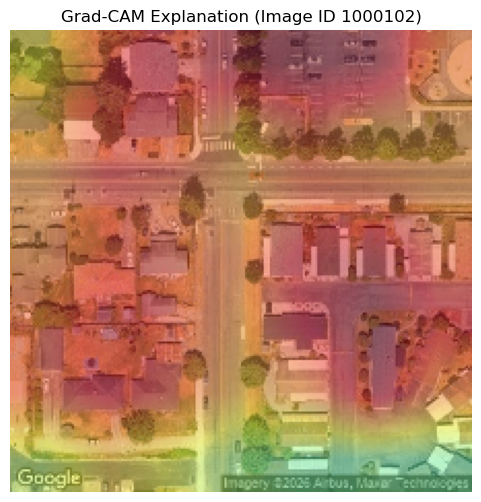

In [165]:
weights = tf.reduce_mean(grads, axis=(0, 1, 2))
cam = tf.reduce_sum(weights * conv_outputs[0], axis=-1)

cam = tf.maximum(cam, 0)
cam = cam / (tf.reduce_max(cam) + 1e-8)
cam = cam.numpy()

cam = cv2.resize(cam, (IMG_SIZE, IMG_SIZE))

original_img = cv2.imread(img_path)
original_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE))

# Ensure 3-channel image
if original_img.ndim == 2:
    original_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)

heatmap = cv2.applyColorMap(
    np.uint8(255 * cam),
    cv2.COLORMAP_JET
)

overlay = cv2.addWeighted(
    original_img.astype(np.uint8), 0.6,
    heatmap.astype(np.uint8), 0.4,
    0
)


plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Grad-CAM Explanation (Image ID {idx})")
plt.show()
